In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

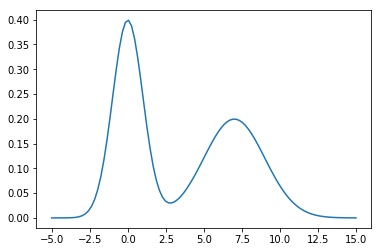

In [53]:
n_train = np.linspace(-5.0, 15.0, 100)
p_train = [norm.pdf(x=n[i], loc=0, scale=1)+norm.pdf(x=n[i], loc=7, scale=2) for i in range(len(n_train))]
n_test = np.linspace(-5.0, 15.0, 30)
p_test = [norm.pdf(x=n[i], loc=0, scale=1)+norm.pdf(x=n[i], loc=7, scale=2) for i in range(len(n_train))]
plt.plot(n_train,p_train)

h: 0.10, log likelihood: 78.98110071917885
h: 0.50, log likelihood: -26.926503602697235
h: 1.00, log likelihood: -93.0109923749392
h: 2.00, log likelihood: -161.48981872594194
h: 4.00, log likelihood: -230.59372504873056
h: 8.00, log likelihood: -299.85562414631283


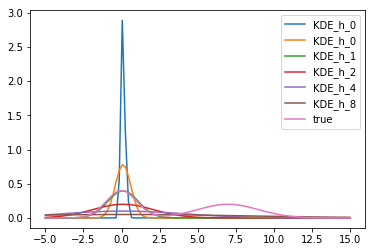

In [57]:
K = lambda x: np.exp(-np.dot(x,x)/2)/(2*np.pi)**(1/2)
p_hat = lambda x: np.sum([K((x-xi)/h) for xi in p])/(len(p)*h)
loglike = lambda X: np.sum([np.log(p_hat(x)) for x in X])
hs = [0.1, 0.5, 1,2,4,8]
for h in hs:
    p_pred = [p_hat(x) for x in n_train]
    plt.plot(n_train,p_pred, label="KDE_h_%d"%h)
    print("h: {:.2f}, log likelihood: {}".format(h,loglike(p_test)))
plt.plot(n_train,p_train, label="true")
plt.legend()